# Experiments



- Try to make the feature binary instead of having floating point to see its impact on performance. 
    - Did not try, as these features would not be binary. 
- Penalizing Rewards 
- Warm start for skip classifier. 
- 


In [278]:
# This is useful when you change your rewards to {-1,1}

import pandas as pd
import numpy as np

df = pd.read_csv('logs_linUCB_small_NEW_REWARD_SKIPPING')
reward = 0
for index,row in df.iterrows():
    if row['reward'] in [1.0]:
        reward += 1
    if row['reward'] in [-1.0]:
        reward -= 1
print(reward)
print(len(df))

191
4634


# Optimal Parameters

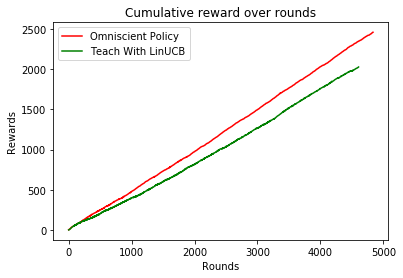

In [28]:
# This gives us rewards per rounds. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_oracle = pd.read_csv('logs_linUCB_small_pretrained')
df_linUCB = pd.read_csv('logs_linUCB_small_online')

# Find the reward accumulate over rounds 
cum_reward_oracle = np.cumsum(df_oracle['reward'])
cum_reward_linUCB = np.cumsum(df_linUCB['reward'])

plt.plot(list(cum_reward_oracle.index),cum_reward_oracle,color='r',label='Omniscient Policy')
plt.plot(list(cum_reward_linUCB.index),cum_reward_linUCB,color='g',label='Teach With LinUCB')
# Find the reward accumulate over rounds 
# cum_reward = np.cumsum(df['reward'])
# plt.plot(list(cum_reward.index),cum_reward,color='r',label='Oracle')
plt.xlabel('Rounds')
plt.ylabel('Rewards')
plt.legend(loc='upper left')
plt.title('Cumulative reward over rounds')
plt.savefig('cum_reward_temp.png')
plt.show()

## Cumulative rewards

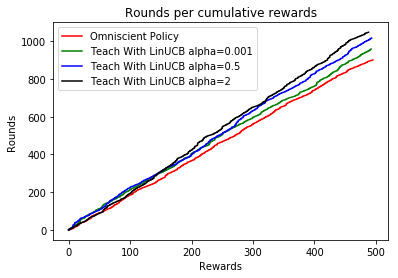

In [79]:
# Rounds per rewards for different values of alpha

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_oracle = pd.read_csv('logs_oracle_verySmall')
df_linUCB_0001 = pd.read_csv('logs_linUCB_verySmall_0.001')
df_linUCB_05 = pd.read_csv('logs_linUCB_verySmall_0.5')
df_linUCB_2 = pd.read_csv('logs_linUCB_verySmall_2')

# Find the reward accumulate over rounds 
cum_reward_oracle = np.cumsum(df_oracle['reward'])
cum_reward_linUCB_0001 = np.cumsum(df_linUCB_0001['reward'])
cum_reward_linUCB_05 = np.cumsum(df_linUCB_05['reward'])
cum_reward_linUCB_2 = np.cumsum(df_linUCB_2['reward'])

# plt.plot(list(cum_reward_oracle.index),cum_reward_oracle,color='r',label='Omniscient Policy')
# plt.plot(list(cum_reward_linUCB_0001.index),cum_reward_linUCB_0001,color='g',label='Teach With LinUCB alpha=0.001')
# plt.plot(list(cum_reward_linUCB_05.index),cum_reward_linUCB_05,color='b',label='Teach With LinUCB alpha=0.5')
# plt.plot(list(cum_reward_linUCB_2.index),cum_reward_linUCB_2,color='black',label='Teach With LinUCB alpha=2')
# plt.xlabel('Rounds')
# plt.ylabel('Rewards')

#Switching to rewards on x-axis and rounds on y-axis

plt.plot(cum_reward_oracle,list(cum_reward_oracle.index),color='r',label='Omniscient Policy')
plt.plot(cum_reward_linUCB_0001,list(cum_reward_linUCB_0001.index),color='g',label='Teach With LinUCB alpha=0.001')
plt.plot(cum_reward_linUCB_05,list(cum_reward_linUCB_05.index),color='b',label='Teach With LinUCB alpha=0.5')
plt.plot(cum_reward_linUCB_2,list(cum_reward_linUCB_2.index),color='black',label='Teach With LinUCB alpha=2')
plt.xlabel('Rewards')
plt.ylabel('Rounds')

# Find the reward accumulate over rounds 
# cum_reward = np.cumsum(df['reward'])
# plt.plot(list(cum_reward.index),cum_reward,color='r',label='Oracle')
plt.legend(loc='upper left')
plt.title('Rounds per cumulative rewards')
plt.savefig('cum_reward_switching_axis.png')
plt.show()


In [26]:
# df_oracle = pd.read_csv('logs_oracle_verySmall')
# df_linUCB_0001 = pd.read_csv('logs_linUCB_verySmall_alpha0.001')
# df_linUCB_05 = pd.read_csv('logs_linUCB_verySmall_alpha0.5')
# df_linUCB_1 = pd.read_csv('logs_linUCB_verySmall_alpha1')
# df_linUCB_2 = pd.read_csv('logs_linUCB_verySmall_alpha2')

# # Find the reward accumulate over rounds 
# cum_reward_oracle = np.cumsum(df_oracle['reward'])
# cum_reward_linUCB_0001 = np.cumsum(df_linUCB_0001['reward'])
# cum_reward_linUCB_05 = np.cumsum(df_linUCB_05['reward'])
# cum_reward_linUCB_1 = np.cumsum(df_linUCB_1['reward'])
# cum_reward_linUCB_2 = np.cumsum(df_linUCB_2['reward'])

# sum(df_linUCB_1['reward'])

In [92]:
df_oracle_rprr = np.array([])
df_oracle_rprr =np.append(df_oracle_rprr,1)
df_oracle_rprr = np.append(df_oracle_rprr,2)
copied_arr = np.append(df_oracle_rprr.copy() , [123])
deno = np.array([0.5,2,10])
copied_arr / deno

array([ 2. ,  1. , 12.3])

In [14]:
# Rounds per rewards RATIO for different values of alpha

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_oracle = pd.read_csv('logs_oracle_verySmall')
df_linUCB_0001 = pd.read_csv('logs_linUCB_verySmall_0.001')
df_linUCB_05 = pd.read_csv('logs_linUCB_verySmall_0.5')
df_linUCB_2 = pd.read_csv('logs_linUCB_verySmall_2')

reward_intervals = np.array([50,100,150,200,250,300,350,400,450])

# df_oracle_rprr = []
# df_linUCB_0001_rprr = []
# df_linUCB_05_rprr= []
# df_linUCB_2_rprr = []

df_oracle_rprr = np.array([])
df_linUCB_0001_rprr =  np.array([])
df_linUCB_05_rprr=  np.array([])
df_linUCB_2_rprr =  np.array([])

for interval in reward_intervals:
    print('Interval : ', interval)
    df_oracle_rprr = np.append(df_oracle_rprr , cum_reward_oracle[cum_reward_oracle == interval].index[0])
    df_linUCB_0001_rprr = np.append(df_linUCB_0001_rprr, cum_reward_linUCB_0001[cum_reward_linUCB_0001 == interval].index[0])
    df_linUCB_05_rprr = np.append(df_linUCB_05_rprr , cum_reward_linUCB_05[cum_reward_linUCB_05 == interval].index[0])
    df_linUCB_2_rprr = np.append(df_linUCB_2_rprr , cum_reward_linUCB_2[cum_reward_linUCB_2 == interval].index[0])

df_oracle_rprr = np.append(df_oracle_rprr , len(df_oracle))
df_linUCB_0001_rprr = np.append(df_linUCB_0001_rprr , len(df_linUCB_0001))
df_linUCB_05_rprr = np.append(df_linUCB_05_rprr , len(df_linUCB_05))
df_linUCB_2_rprr = np.append(df_linUCB_2_rprr , len(df_linUCB_2))

reward_intervals_oracle = np.append(reward_intervals.copy() , [cum_reward_oracle[len(df_oracle) - 1]])
reward_intervals_linUCB_0001 = np.append(reward_intervals.copy() , [cum_reward_linUCB_0001[len(df_linUCB_0001) - 1]])
reward_intervals_linUCB_05 = np.append(reward_intervals.copy() , [cum_reward_linUCB_05[len(df_linUCB_05) - 1]])
reward_intervals_linUCB_2 = np.append(reward_intervals.copy() , [cum_reward_linUCB_2[len(df_linUCB_2) - 1]])






plt.plot(reward_intervals_oracle,(df_oracle_rprr / reward_intervals_oracle),color='r',marker='o',label='Omniscient Policy')
plt.plot(reward_intervals_linUCB_0001,(df_linUCB_0001_rprr / reward_intervals_linUCB_0001),color='g',marker='o',label='Teach With LinUCB alpha=0.001')
plt.plot(reward_intervals_linUCB_05,(df_linUCB_05_rprr / reward_intervals_linUCB_05),color='b',marker='o',label='Teach With LinUCB alpha=0.5')
plt.plot(reward_intervals_linUCB_2,(df_linUCB_2_rprr / reward_intervals_linUCB_2) , color='black',marker='o',label='Teach With LinUCB alpha=2')
plt.xlabel('Rewards')
plt.ylabel('Rounds per rewards')

# Find the reward accumulate over rounds 
# cum_reward = np.cumsum(df['reward'])
# plt.plot(list(cum_reward.index),cum_reward,color='r',label='Oracle')
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.title('Rounds per cumulative rewards for alpha')
plt.savefig('rounds_per_reward_for_alpha.pdf',bbox_inches='tight')
plt.show()

# print("df_oracle_rpri : " , df_oracle_rpri)
# print("df_linUCB_0001_rpri : " , df_linUCB_0001_rpri)
# print("df_linUCB_05_rpri : " , df_linUCB_05_rpri)
# print("df_linUCB_2_rpri : " , df_linUCB_2_rpri)
# print("df_oracle_rpri : " , df_oracle_rpri)
# print("df_linUCB_0001_rpri : " , df_linUCB_0001_rpri)
# print("df_linUCB_05_rpri : " , df_linUCB_05_rpri)
# print("df_linUCB_2_rpri : " , df_linUCB_2_rpri)

Interval :  50


NameError: name 'cum_reward_linUCB_0001' is not defined

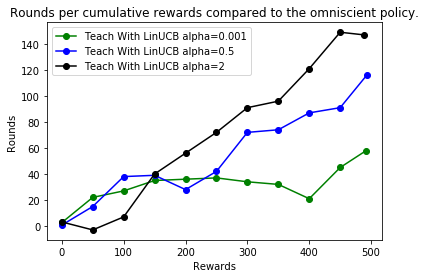

In [53]:
# Number of rounds per rewards with respect to the omniscient policy. 

df_linUCB_0001_rpri_diff = np.array(df_linUCB_0001_rpri) - np.array(df_oracle_rpri) 
df_linUCB_05_rpri_diff = np.array(df_linUCB_05_rpri ) - np.array(df_oracle_rpri) 
df_linUCB_2_rpri_diff = np.array(df_linUCB_2_rpri) - np.array(df_oracle_rpri) 

# plt.plot(reward_intervals_oracle,df_oracle_rpri,color='r',marker='o',label='Omniscient Policy')
plt.plot(reward_intervals_linUCB_0001,df_linUCB_0001_rpri_diff,color='g',marker='o',label='Teach With LinUCB alpha=0.001')
plt.plot(reward_intervals_linUCB_05,df_linUCB_05_rpri_diff,color='b',marker='o',label='Teach With LinUCB alpha=0.5')
plt.plot(reward_intervals_linUCB_2,df_linUCB_2_rpri_diff,color='black',marker='o',label='Teach With LinUCB alpha=2')

plt.xlabel('Rewards')
plt.ylabel('Rounds')
# Find the reward accumulate over rounds 
# cum_reward = np.cumsum(df['reward'])
# plt.plot(list(cum_reward.index),cum_reward,color='r',label='Oracle')
plt.legend(loc='upper left')
plt.title('Rounds per cumulative rewards compared to the omniscient policy.')
plt.savefig('rounds_per_rewards_wrt_omni.pdf',bbox_inches='tight')
#f.savefig("foo.pdf", bbox_inches='tight')
plt.show()

In [19]:
# Get total cumulative rewards

import pandas as pd
import numpy as np

# df_oracle = pd.read_csv('logs_oracle_small_NO_SKIPPING')
# df_linUCB = pd.read_csv('logs_linUCB_small_NO_SKIPPING')

df_oracle = pd.read_csv('logs_oracle_large')
df_linUCB = pd.read_csv('logs_linUCB_large')

total_reward_oracle = np.sum(df_oracle['reward'])
total_reward_linUCB = np.sum(df_linUCB['reward'])

print(total_reward_oracle , total_reward_linUCB)

38891.0 37350.0


In [20]:
# Setting reward intervals.

reward_interval = 500
reward_intervals = np.array([])
total_reward_linUCB = np.sum(df_linUCB['reward'])
# max_rounds = np.max([len(df_oracle),len(df_linUCB)])
# max_rounds
while reward_interval < total_reward_linUCB:
    reward_intervals = np.append(reward_intervals, reward_interval)
    reward_interval += 500
reward_intervals

array([  500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,  4000.,
        4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,  8000.,
        8500.,  9000.,  9500., 10000., 10500., 11000., 11500., 12000.,
       12500., 13000., 13500., 14000., 14500., 15000., 15500., 16000.,
       16500., 17000., 17500., 18000., 18500., 19000., 19500., 20000.,
       20500., 21000., 21500., 22000., 22500., 23000., 23500., 24000.,
       24500., 25000., 25500., 26000., 26500., 27000., 27500., 28000.,
       28500., 29000., 29500., 30000., 30500., 31000., 31500., 32000.,
       32500., 33000., 33500., 34000., 34500., 35000., 35500., 36000.,
       36500., 37000.])

Interval :  3000.0
Interval :  6000.0
Interval :  9000.0
Interval :  12000.0
Interval :  15000.0
Interval :  18000.0
Interval :  21000.0
Interval :  24000.0
Interval :  27000.0
Interval :  30000.0
Interval :  33000.0
Interval :  36000.0
df_oracle_rprr :  [ 5529. 10892. 16526. 22119. 27541. 32841. 38187. 43658. 49198. 54696.
 60296. 65798. 71449.]
reward_intervals_oracle :  [ 3000.  6000.  9000. 12000. 15000. 18000. 21000. 24000. 27000. 30000.
 33000. 36000. 38891.]
df_linUCB_rprr :  [ 6699. 13114. 19803. 26095. 32159. 38092. 44082. 50045. 56104. 62176.
 68236. 74276. 77179.]
reward_intervals_linUCB :  [ 3000.  6000.  9000. 12000. 15000. 18000. 21000. 24000. 27000. 30000.
 33000. 36000. 37350.]
****************************************************************************************************************


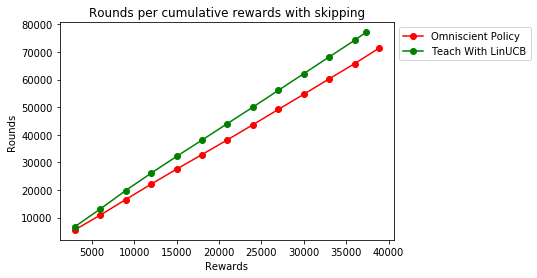

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_oracle = pd.read_csv('logs_oracle_small_OPTIMAL')
# df_linUCB = pd.read_csv('logs_linUCB_small_OPTIMAL')

df_oracle = pd.read_csv('logs_oracle_large')
df_linUCB = pd.read_csv('logs_linUCB_large')

cum_reward_oracle = np.cumsum(df_oracle['reward'])
cum_reward_linUCB = np.cumsum(df_linUCB['reward'])

# sum(df_linUCB_0001['reward'])
# reward_intervals = [50,250,500,750,1000,1250,1500,1750,2000] 
# oracle_rpr = []
# linUCB_rpr = []
reward_interval = 3000
reward_intervals = np.array([])
total_reward_linUCB = np.sum(df_linUCB['reward'])
# max_rounds = np.max([len(df_oracle),len(df_linUCB)])
# max_rounds
while reward_interval < total_reward_linUCB:
    reward_intervals = np.append(reward_intervals, reward_interval)
    reward_interval += 3000
#reward_intervals = np.array([50,250,500,750,1000,1250,1500,1750,2000])

df_oracle_rprr = np.array([])
df_linUCB_rprr = np.array([])

for interval in reward_intervals:
    print('Interval : ', interval)
    df_oracle_rprr = np.append(df_oracle_rprr , cum_reward_oracle[cum_reward_oracle == interval].index[0])
    df_linUCB_rprr = np.append(df_linUCB_rprr, cum_reward_linUCB[cum_reward_linUCB == interval].index[0])

df_oracle_rprr = np.append(df_oracle_rprr , len(df_oracle))
df_linUCB_rprr = np.append(df_linUCB_rprr , len(df_linUCB))

reward_intervals_oracle = np.append(reward_intervals.copy() , [cum_reward_oracle[len(df_oracle) - 1]])
reward_intervals_linUCB = np.append(reward_intervals.copy() , [cum_reward_linUCB[len(df_linUCB) - 1]])
# print("reward_intervals_linUCB: ", reward_intervals_linUCB)
# print("df_linUCB_rprr : ", df_linUCB_rprr)
# print("(df_linUCB_rprr / reward_intervals_linUCB) : ", (df_linUCB_rprr / reward_intervals_linUCB))

print("df_oracle_rprr : ", df_oracle_rprr)
print("reward_intervals_oracle : ", reward_intervals_oracle)
print("df_linUCB_rprr : ", df_linUCB_rprr)
print("reward_intervals_linUCB : ", reward_intervals_linUCB)

# plt.plot(reward_intervals_oracle,(df_oracle_rprr / reward_intervals_oracle),color='r',marker='o',label='Omniscient Policy')
# plt.plot(reward_intervals_linUCB,(df_linUCB_rprr / reward_intervals_linUCB),color='g',marker='o',label='Teach With LinUCB')
# plt.xlabel('Rewards')
# plt.ylabel('Rounds per rewards')

# # Find the reward accumulate over rounds 
# # cum_reward = np.cumsum(df['reward'])
# # plt.plot(list(cum_reward.index),cum_reward,color='r',label='Oracle')
# plt.legend(loc='best',bbox_to_anchor=(1,1))
# plt.title('Rounds per cumulative rewards with skipping')
# plt.savefig('rounds_per_reward_ratio_with_skipping_large.pdf',bbox_inches='tight')

print("****************************************************************************************************************")

plt.plot(reward_intervals_oracle,(df_oracle_rprr),color='r',marker='o',label='Omniscient Policy')
plt.plot(reward_intervals_linUCB,(df_linUCB_rprr),color='g',marker='o',label='Teach With LinUCB')
plt.xlabel('Rewards')
plt.ylabel('Rounds')
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.title('Rounds per cumulative rewards with skipping')
plt.savefig('rounds_per_reward_with_skipping_large.pdf',bbox_inches='tight')


plt.show()


In [23]:
reward_intervals_oracle = np.append(reward_intervals.copy() , [cum_reward_oracle[len(df_oracle) - 1]])
reward_intervals_linUCB = np.append(reward_intervals.copy() , [cum_reward_linUCB[len(df_linUCB) - 1]])

for interval in reward_intervals:
    oracle_rpr.append(cum_reward_oracle[cum_reward_oracle == interval].index[0])
    linUCB_rpr.append(cum_reward_linUCB[cum_reward_linUCB == interval].index[0])
#     df_linUCB_05_rpri.append(cum_reward_linUCB_05[cum_reward_linUCB_05 == interval].index[0])
#     df_linUCB_2_rpri.append(cum_reward_linUCB_2[cum_reward_linUCB_2 == interval].index[0])

oracle_rpr.append(len(df_oracle))
linUCB_rpr.append(len(df_linUCB))

reward_intervals_oracle = reward_intervals.copy() + [cum_reward_oracle[len(df_oracle) - 1]]
reward_intervals_linUCB = reward_intervals.copy() + [cum_reward_linUCB[len(df_linUCB) - 1]]


plt.plot(reward_intervals_oracle,oracle_rpr,color='r',marker='o',label='Omniscient Policy')
plt.plot(reward_intervals_linUCB,linUCB_rpr,color='g',marker='o',label='Teach With LinUCB')
# plt.plot(reward_intervals_linUCB_05,df_linUCB_05_rpri,color='b',marker='o',label='Teach With LinUCB alpha=0.5')
# plt.plot(reward_intervals_linUCB_2,df_linUCB_2_rpri,color='black',marker='o',label='Teach With LinUCB alpha=2')
plt.xlabel('Rewards')
plt.ylabel('Rounds')

# Find the reward accumulate over rounds 
# cum_reward = np.cumsum(df['reward'])
# plt.plot(list(cum_reward.index),cum_reward,color='r',label='Oracle')
plt.legend(loc='upper left')
plt.title('Rounds per cumulative rewards with optimal hyper-parameters')
plt.savefig('rounds_per_reward_with_skipping.pdf',bbox_inches='tight')
plt.show()



# print("df_oracle_rpri : " , df_oracle_rpri)
# print("df_linUCB_0001_rpri : " , df_linUCB_0001_rpri)
# print("df_linUCB_05_rpri : " , df_linUCB_05_rpri)
# print("df_linUCB_2_rpri : " , df_linUCB_2_rpri)

NameError: name 'oracle_rpr' is not defined

In [219]:
## Find Challenging Topics
# df_oracle['topic'].value_counts().plot(kind='barh')

## Student Progression
# student_progression = df_linUCB['student_number'].value_counts()

# student_progression_10_to_15 = len(student_progression[student_progression.between(left = 10 , right = 15)])
# student_progression_16_to_20 = len(student_progression[student_progression.between(left = 16 , right = 20)])
# student_progression_21_to_25 = len(student_progression[student_progression.between(left = 21 , right = 25)])
# student_progression_26_to_30 = len(student_progression[student_progression.between(left = 26 , right = 30)])
# student_progression_31_to_35 = len(student_progression[student_progression.between(left = 31 , right = 35)])
# student_progression_36_to_40 = len(student_progression[student_progression.between(left = 36 , right = 40)])

# X = pd.Series(['10-15','16-20','21-25','26-30','31-35','36-40'])
# Y = pd.Series([student_progression_10_to_15,student_progression_16_to_20,student_progression_21_to_25,student_progression_26_to_30,
#               student_progression_31_to_35,student_progression_36_to_40])
# plt.bar(X,Y)
# plt.xlabel('Rounds')
# plt.ylabel('Students')
# #plt.legend(loc='upper right')
# plt.title('Rounds needed by students')
# #plt.savefig('cum_reward.png')
# plt.show()
              
## Rounds to complete a course
# How many rounds did it take for a student to complete the course. 
# rounds_per_student = df_linUCB['student_number'].value_counts()
# rounds_per_student.value_counts()
# rounds_per_student.value_counts().plot(kind='barh')

## Round per topic for a student to complete the course. 
# df_student = df_linUCB[df_linUCB['student_number'] == 3]
# df_student['topic'].value_counts()

## Efficacy of Content
# Usefulness / Efficacy of the content presented. For project show top 5 most effective & most ineffective to paint a picture. 
# df_linUCB.tail()
# reward_per_arm = df_linUCB[['arm_pulled','reward']]
# reward_per_arm.groupby(["arm_pulled", "reward"]).size()

## Skipping Algorithm

STATISTICS OF VARIOUS EXPERIMENTS

Lets start to find 

ORACLE

For CT = 0 over verySmall

sc_success : 260 , sc_failure : 181 , total : 441 
success : 50 and failure : 40

actual_decision  skip_decision  reward
0                0              0.0       181
                                1.0       260
1                1              0.0        79
                                1.0       119
                                
For CT = 10 over verySmall

sc_success : 238 , sc_failure : 173 , total : 411 
sc_ct_success : 70, sc_ct_failure : 51  , total : 121
success : 55 and failure : 36

actual_decision  skip_decision  reward
0                0              0.0       173
                                1.0       238
1                0              0.0        51
                                1.0        70
                 1              0.0        66
                                1.0        73

For CT = 20 over verySmall

sc_success : 238 , sc_failure : 189 , total : 427 
sc_ct_success : 140, sc_ct_failure : 108  , total : 248
success : 25 and failure : 30

actual_decision  skip_decision  reward
0                0              0.0       189
                                1.0       238
1                0              0.0       108
                                1.0       140
                 1              0.0        42
                                1.0        55


For CT = 30 over verySmall

sc_success : 284 , sc_failure : 215 , total : 499 
sc_ct_success : 178, sc_ct_failure : 128  , total : 306
success : 9 and failure : 7

actual_decision  skip_decision  reward
0                0              0.0       215
                                1.0       284
1                0              0.0       128
                                1.0       178
                 1              0.0         8
                                1.0        16                            

For CT = 40 over verySmall

sc_success : 277 , sc_failure : 206 , total : 483 
sc_ct_success : 197, sc_ct_failure : 169  , total : 366 
success : 7 and failure : 2

Performance 
SC : 
SC_CT : 

actual_decision  skip_decision  reward
0                0              0.0       206
                                1.0       277
1                0              0.0       169
                                1.0       197
                 1              0.0         4
                                1.0         7
                                
Online 

actual_decision  skip_decision  reward
0                0              0.0       190
                                1.0       192
1                0              0.0        66
                                1.0        57
                 1              0.0        90
                                1.0       102

sc_success : 192 , sc_failure : 190 , total : 382 
sc_ct_success : 192, sc_ct_failure : 190  , total : 382
success : 55 and failure : 58

Pre-trained

actual_decision  skip_decision  reward
0                0              0.0       230
                                1.0       216
1                0              0.0        95
                                1.0       107
                 1              0.0        62
                                1.0        62
dtype: int64

sc_success : 216 , sc_failure : 230 , total : 446 
sc_ct_success : 216, sc_ct_failure : 230  , total : 446
success : 39 and failure : 37

Online - small 

actual_decision  skip_decision  skip_enabled  reward
0                0              False         0.0       648
                                              1.0       653
                                True          0.0       472
                                              1.0       420
1                0              False         0.0       363
                                              1.0       340
                                True          0.0       383
                                              1.0       363
                 1              False         0.0       244
                                              1.0       252
dtype: int64

sc_success : 1073 , sc_failure : 1120 , total : 2193 
sc_ct_success : 703, sc_ct_failure : 746  , total : 1449
success : 170 and failure : 152

Pretrained - small 

actual_decision  skip_decision  skip_enabled  reward
0                0              False         0.0       663
                                              1.0       702
                                True          0.0       515
                                              1.0       584
1                0              False         0.0       549
                                              1.0       560
                                True          0.0       597
                                              1.0       606
                 1              False         0.0        17
                                              1.0         9
dtype: int64

sc_success : 1286 , sc_failure : 1178 , total : 2464 
sc_ct_success : 1166, sc_ct_failure : 1146  , total : 2312
success : 17 and failure : 17

*****************Reward between -1 and 1******************************************
For CT = 0 over verySmall

actual_decision  skip_decision  skip_enabled  reward
0                0              False         -1.0      116
                                               1.0      179
                                True          -1.0       74
                                               1.0       82
1                1              False         -1.0       82
                                               1.0      123
dtype: int64

sc_success : 67 , sc_failure : 63 , total : 130 
success : 54 and failure : 44

sc_success : 82 , sc_failure : 74 , total : 156
success : 64 and failure : 39

For CT = 10 over verySmall

actual_decision  skip_decision  skip_enabled  reward
0                0              False         -1.0      125
                                               1.0      173
                                True          -1.0       60
                                               1.0       72
1                0              False         -1.0       25
                                               1.0       39
                                True          -1.0       23
                                               1.0       27
                 1              False         -1.0       45
                                               1.0       93
dtype: int64

sc_success : 72 , sc_failure : 60 , total : 132 
sc_ct_success : 27, sc_ct_failure : 23  , total : 50
success : 52 and failure : 31

For CT = 20 over verySmall

actual_decision  skip_decision  skip_enabled  reward
0                0              False         -1.0      107
                                               1.0      186
                                True          -1.0       82
                                               1.0       80
1                0              False         -1.0       70
                                               1.0       71
                                True          -1.0       41
                                               1.0       59
                 1              False         -1.0       34
                                               1.0       32
dtype: int64

sc_success : 80 , sc_failure : 82 , total : 162 
sc_ct_success : 59, sc_ct_failure : 41  , total : 100
success : 39 and failure : 20

For CT = 30 over verySmall

actual_decision  skip_decision  skip_enabled  reward
0                0              False         -1.0      128
                                               1.0      193
                                True          -1.0       63
                                               1.0       81
1                0              False         -1.0       50
                                               1.0       89
                                True          -1.0       57
                                               1.0       78
                 1              False         -1.0       15
                                               1.0       25
dtype: int64

sc_success : 81 , sc_failure : 63 , total : 144 
sc_ct_success : 78, sc_ct_failure : 57  , total : 135
success : 19 and failure : 12

********************************************Optimal***************************************

VERY SMALL 

Oracle

actual_decision  skip_decision  skip_enabled  reward
0                0              False         -1.0      117
                                               1.0      178
                                True          -1.0       68
                                               1.0       79
1                0              False         -1.0       55
                                               1.0       93
                                True          -1.0       52
                                               1.0       54
                 1              False         -1.0       24
                                               1.0       33
dtype: int64

sc_success : 79 , sc_failure : 68 , total : 147 
sc_ct_success : 54, sc_ct_failure : 52  , total : 106
success : 32 and failure : 25

sc_success : 96 , sc_failure : 94 , total : 190 
sc_ct_success : 63, sc_ct_failure : 43  , total : 106
success : 22 and failure : 19

sc_success : 109 , sc_failure : 62 , total : 171 
sc_ct_success : 81, sc_ct_failure : 56  , total : 137
success : 9 and failure : 6

Small

actual_decision  skip_decision  skip_enabled  reward
0                0              False         -1.0      623
                                               1.0      871
                                True          -1.0      440
                                               1.0      515
1                0              False         -1.0      375
                                               1.0      509
                                True          -1.0      345
                                               1.0      401
                 1              False         -1.0       54
                                               1.0       68
dtype: int64

sc_success : 515 , sc_failure : 440 , total : 955 
sc_ct_success : 401, sc_ct_failure : 345  , total : 746
success : 70 and failure : 64


LinUCB

actual_decision  skip_decision  skip_enabled  reward
0                0              False         -1.0      131
                                               1.0      156
                                True          -1.0       81
                                               1.0       91
1                0              False         -1.0       64
                                               1.0       83
                                True          -1.0       61
                                               1.0       61
                 1              False         -1.0       25
                                               1.0       41
dtype: int64


sc_success : 91 , sc_failure : 81 , total : 172 
sc_ct_success : 61, sc_ct_failure : 61  , total : 122
success : 28 and failure : 23

sc_success : 79 , sc_failure : 99 , total : 178 
sc_ct_success : 124, sc_ct_failure : 101  , total : 225
success : 20 and failure : 15

sc_success : 95 , sc_failure : 77 , total : 172 
sc_ct_success : 101, sc_ct_failure : 129  , total : 230
success : 13 and failure : 9

Small 

actual_decision  skip_decision  skip_enabled  reward
0                0              False         -1.0      655
                                               1.0      741
                                True          -1.0      464
                                               1.0      520
1                0              False         -1.0      463
                                               1.0      499
                                True          -1.0      492
                                               1.0      485
                 1              False         -1.0       61
                                               1.0       81
dtype: int64

sc_success : 520 , sc_failure : 464 , total : 984 
sc_ct_success : 485, sc_ct_failure : 492  , total : 977
success : 90 and failure : 81

*************************************************Confidence Threshold*******************************************************
LinUCB 

Confidence Threshold 

CT:0

sc_success : 66 , sc_failure : 48 , total : 114 
success : 77 and failure : 59

sc_success : 90 , sc_failure : 70 , total : 160 
success : 68 and failure : 51

CT:10

sc_success : 72 , sc_failure : 70 , total : 142 
sc_ct_success : 28, sc_ct_failure : 28  , total : 56
success : 60 and failure : 37

CT20

sc_success : 78 , sc_failure : 77 , total : 155 
sc_ct_success : 61, sc_ct_failure : 48  , total : 109
success : 30 and failure : 30

CT30

sc_success : 80 , sc_failure : 82 , total : 162 
sc_ct_success : 111, sc_ct_failure : 81  , total : 192
success : 19 and failure : 9

*********************************************OPTIMAL****************************************

rEWAARD is {0,1}. Optimal alpha & threshold. Skippling Allowed 

Online : Gives warm start 

Oracle 

Giving Warm Start 

sc_success : 93 , sc_failure : 77 , total : 170 
sc_ct_success : 48, sc_ct_failure : 35  , total : 83
success : 36 and failure : 27

After warm start 

sc_success : 441 , sc_failure : 381 , total : 822 
sc_ct_success : 184, sc_ct_failure : 143  , total : 327
uccess : 202 and failure : 145

linUCB

Giving Warm Start 

sc_success : 82 , sc_failure : 68 , total : 150 
sc_ct_success : 46, sc_ct_failure : 36  , total : 82
success : 35 and failure : 37

After warm start 

sc_success : 459 , sc_failure : 365 , total : 824 
sc_ct_success : 223, sc_ct_failure : 200  , total : 423
success : 213 and failure : 203

In [16]:
df_oracle = pd.read_csv('logs_linUCB_large')
df_1 = df_oracle[["actual_decision","skip_decision","skip_enabled","reward"]]
perf_data = df_1.groupby(["actual_decision","skip_decision","skip_enabled","reward"]).size()
perf_data_groupby = df_1.groupby(["actual_decision","skip_decision","skip_enabled","reward"])
perf_data

actual_decision  skip_decision  skip_enabled  reward
0                0              False         0.0       10686
                                              1.0       11203
                                True          0.0        6979
                                              1.0        7087
1                0              False         0.0        7991
                                              1.0        7903
                                True          0.0       10807
                                              1.0       10084
                 1              False         0.0        1144
                                              1.0        1073
dtype: int64

In [17]:
sc_success = len(perf_data_groupby.get_group((0,0,True,1.0))) 
sc_failure = len(perf_data_groupby.get_group((0,0,True,0.0)))
sc_ct_success = len(perf_data_groupby.get_group((1,0,True,1.0)))
sc_ct_failure = len(perf_data_groupby.get_group((1,0,True,0.0)))
total_sc = sc_success + sc_failure
total_sc_ct = sc_ct_success + sc_ct_failure
print('sc_success : {0} , sc_failure : {1} , total : {2} '.format(sc_success,sc_failure,total_sc))
print('sc_ct_success : {0}, sc_ct_failure : {1}  , total : {2}'.format(sc_ct_success,sc_ct_failure,total_sc_ct))


sc_success : 7087 , sc_failure : 6979 , total : 14066 
sc_ct_success : 10084, sc_ct_failure : 10807  , total : 20891


In [18]:
all_students = df_oracle['student_number'].unique()
success = 0
failure = 0
for student in all_students:
    student_history = df_oracle[df_oracle['student_number'] == student]
    topic_skipped = False
    for index,row in student_history.iterrows():
        if row['reward'] not in [0.0,1.0]:
            topic_skipped = True
            continue
        if topic_skipped:
            if row['reward'] == 0.0:
                failure += 1
            if row['reward'] == 1.0:
                success += 1
            topic_skipped = False
print('success : {0} and failure : {1}'.format(success,failure))   
# nan_var = df_oracle_student_0.loc[86,'reward']
# if nan_var not in [0.0,1.0]:
#     print(nan_var)

success : 1076 and failure : 1146


In [109]:
#df_oracle[df_oracle['reward'].isnull()]
#df_oracle_student_0 = df_oracle[df_oracle['student_number'] == 0]
# success = 0
# failure = 0
# topic_skipped = False
# for index , row in df_oracle.iterrows():
#     if row['reward'] not in [-1.0,1.0]:
#         topic_skipped = True
#         continue
#     if topic_skipped:
#         if row['reward'] == 0:
#             failure += 1
#         if row['reward'] == 1:
#             success += 1
#         topic_skipped = False
# print('success : {0} and failure : {1}'.format(success,failure))    
 

In [111]:
# What happens in the round after we decide to skip
# success = 0
# failure = 0
# df_1 = df_oracle.copy()
# students = df_1.student_number.unique()
# for s in students[:1]:
#     s_df = df_1[df_1['student_number'] == s]
#     # Condition 1: 
#     if s_df['actual_decision'] == 0 and s_df['reward'] == 0:
    
# Find all unique students 
    # For each student find corresponding entries in datadrame & sort by index. 
      # Add conditions to find number of correct prediction versus number of incorrect predictions. 
        
# df_1[df_1['student_number'] == 8]

# df_1.groupby(['reward']).size()

#df_1 = df_1[["actual_decision","skip_decision","reward"]]


# If the skip decision is 1, then whether that was the right decision, depends on the reward for obtained immediately 
# after skipping. So we need to sort the data by student_number & topic. 
# df_copy = df_linUCB.copy()
# df_copy.sort_values(['student_number', 'topic'], ascending=[True, True])

# import pandas as pd 
# df_linUCB = pd.read_csv('logs_linUCB_small')
# df_linUCB_student = df_linUCB[df_linUCB['student_number'] == 2]
# success = 0
# failure = 0 
# topic_skipped = False
# for i in df_linUCB_student:
#     if i['reward'] not in [0.0,1.0]: 
#         topic_skipped = True
#         continue
#     if topic_skipped:
#         if i['reward'] == 0:
#             failure += 1
#         if i['reward'] == 1:
#             success += 1
#         topic_skipped = False
# print('success {0} & failures {1}'.format(success,failure))        
            
        

FileNotFoundError: File b'logs_linUCB_small' does not exist

# Optimal value of $\alpha$

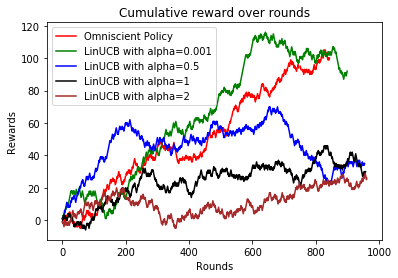

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_oracle = pd.read_csv('logs_oracle_verySmall')

df_oracle = pd.read_csv('logs_oracle_verySmall')
df_linUCB_0001 = pd.read_csv('logs_linUCB_verySmall_alpha0.001')
df_linUCB_05 = pd.read_csv('logs_linUCB_verySmall_alpha0.5')
df_linUCB_1 = pd.read_csv('logs_linUCB_verySmall_alpha1')
df_linUCB_2 = pd.read_csv('logs_linUCB_verySmall_alpha2')

# Find the reward accumulate over rounds 
cum_reward_oracle = np.cumsum(df_oracle['reward'])
cum_reward_linUCB_0001 = np.cumsum(df_linUCB_0001['reward'])
cum_reward_linUCB_05 = np.cumsum(df_linUCB_05['reward'])
cum_reward_linUCB_1 = np.cumsum(df_linUCB_1['reward'])
cum_reward_linUCB_2 = np.cumsum(df_linUCB_2['reward'])

plt.plot(list(cum_reward_oracle.index),cum_reward_oracle,color='r',label='Omniscient Policy')
plt.plot(list(cum_reward_linUCB_0001.index),cum_reward_linUCB_0001,color='g',label='LinUCB with alpha=0.001')
plt.plot(list(cum_reward_linUCB_05.index),cum_reward_linUCB_05,color='b',label='LinUCB with alpha=0.5')
plt.plot(list(cum_reward_linUCB_1.index),cum_reward_linUCB_1,color='black',label='LinUCB with alpha=1')
plt.plot(list(cum_reward_linUCB_2.index),cum_reward_linUCB_2,color='brown',label='LinUCB with alpha=2')
# Find the reward accumulate over rounds 
# cum_reward = np.cumsum(df['reward'])
# plt.plot(list(cum_reward.index),cum_reward,color='r',label='Oracle')
plt.xlabel('Rounds')
plt.ylabel('Rewards')
plt.legend(loc='upper left')
plt.title('Cumulative reward over rounds')
plt.savefig('cum_reward_compare_alphas.png')
plt.show()